In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
x=df.iloc[:,:].values
y=df.iloc[:,:].values
print(x)

[[19 'female' 27.9 ... 'yes' 'southwest' 16884.924]
 [18 'male' 33.77 ... 'no' 'southeast' 1725.5523]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.462]
 ...
 [18 'female' 36.85 ... 'no' 'southeast' 1629.8335]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.945]
 [61 'female' 29.07 ... 'yes' 'northwest' 29141.3603]]


In [6]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

age : 47 labels
sex : 2 labels
bmi : 548 labels
children : 6 labels
smoker : 2 labels
region : 4 labels
charges : 1337 labels


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_smoker = LabelEncoder()
df.smoker = labelencoder_smoker.fit_transform(df.smoker)
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)
labelencoder_region = LabelEncoder()
df.region = labelencoder_region.fit_transform(df.region)


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe_region = OneHotEncoder()
arr_ohe_region = ohe_region.fit_transform(df.region_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(arr_ohe_region, columns=['region_'+str(i) for i in range(arr_ohe_region.shape[1])])
ohe_sex = OneHotEncoder()
arr_ohe_sex = ohe_sex.fit_transform(df.sex_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(arr_ohe_sex, columns=['sex_'+str(i) for i in range(arr_ohe_sex.shape[1])])
ohe_smoker = OneHotEncoder()
arr_ohe_smoker = ohe_smoker.fit_transform(df.smoker_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(arr_ohe_smoker, columns=['smoker_'+str(i) for i in range(arr_ohe_smoker.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
df.head(20)


,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded,smoker_0,smoker_1,smoker_0,smoker_1
0,19,0,27.900,0,1,3,16884.92400,0,1,3,0.0,1.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,1,0,2,1.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,1,0,2,1.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,1,0,1,1.0,0.0,1.0,0.0
4,32,1,28.880,0,0,1,3866.85520,1,0,1,1.0,0.0,1.0,0.0
5,31,0,25.740,0,0,2,3756.62160,0,0,2,1.0,0.0,1.0,0.0
6,46,0,33.440,1,0,2,8240.58960,0,0,2,1.0,0.0,1.0,0.0
7,37,0,27.740,3,0,1,7281.50560,0,0,1,1.0,0.0,1.0,0.0
8,37,1,29.830,2,0,0,6406.41070,1,0,0,1.0,0.0,1.0,0.0
9,60,0,25.840,0,0,1,28923.13692,0,0,1,1.0,0.0,1.0,0.0


In [37]:
preprocessed_df = df.drop(['sex','smoker','region',
                               'region_encoded'], axis=1)


preprocessed_df.head(5)

,age,bmi,children,charges,sex_encoded,smoker_encoded,smoker_0,smoker_1,smoker_0,smoker_1
0,19,27.900,0,16884.92400,0,1,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,1.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,1,0,1.0,0.0,1.0,0.0


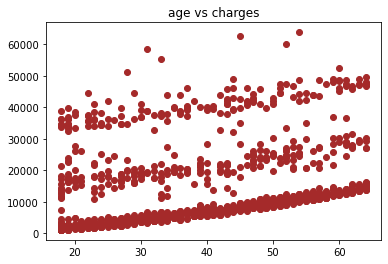

In [38]:
plt.scatter(x[:,0],y,c='brown')
plt.title('age vs charges')
plt.show()

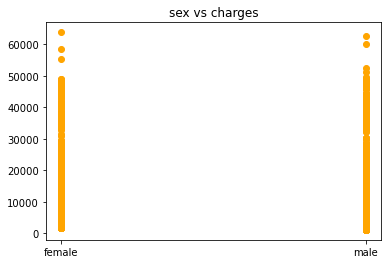

In [35]:
plt.scatter(x[:,1],y,c='orange')
plt.title('sex vs charges')
plt.show()

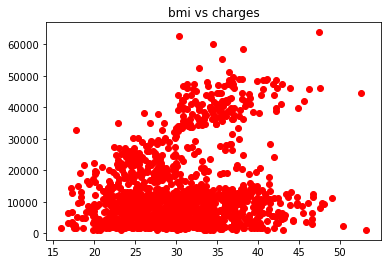

In [28]:
plt.scatter(x[:,2],y,c='red')
plt.title('bmi vs charges')
plt.show()

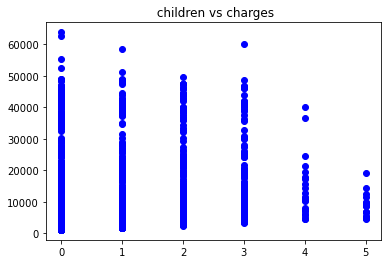

In [30]:
plt.scatter(x[:,3],y,c='blue')
plt.title(' children vs charges')
plt.show()

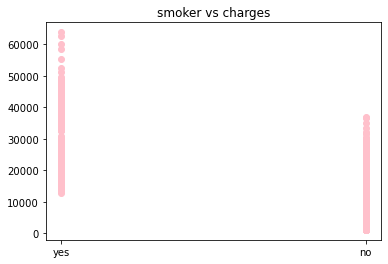

In [32]:
plt.scatter(x[:,4],y,c='pink')
plt.title('smoker vs charges')
plt.show()

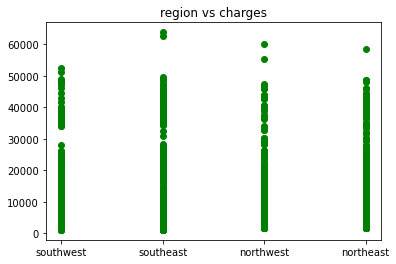

In [33]:
plt.scatter(x[:,5],y,c='green')
plt.title('region vs charges')
plt.show()

In [20]:
X = df.drop('charges',axis=1)
y = df['charges']

In [21]:

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 20)

In [22]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators = 100, random_state = 20)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=20)

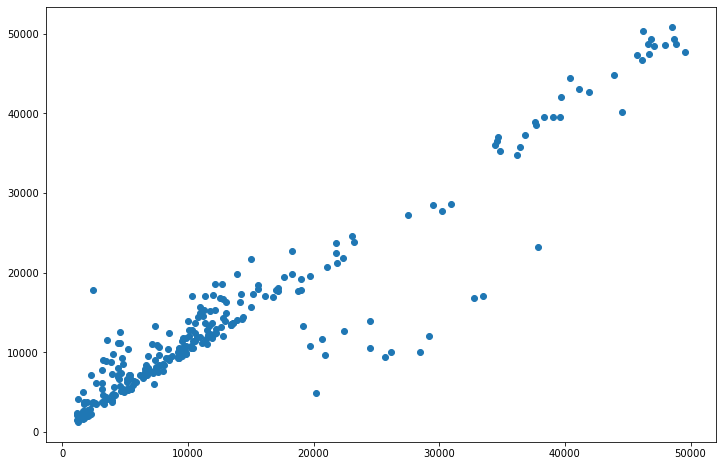

In [23]:
predictions = randomforest.predict(x_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test_data: ', round(r2_score(y_test,predictions), 2))

MAE: 2336.6085944052866
MSE: 16705446.174932519
RMSE: 4087.229645485132
R2 test_data:  0.89


Text(0.5, 1.0, 'Cross-validated Prediction accuracy of Charges')

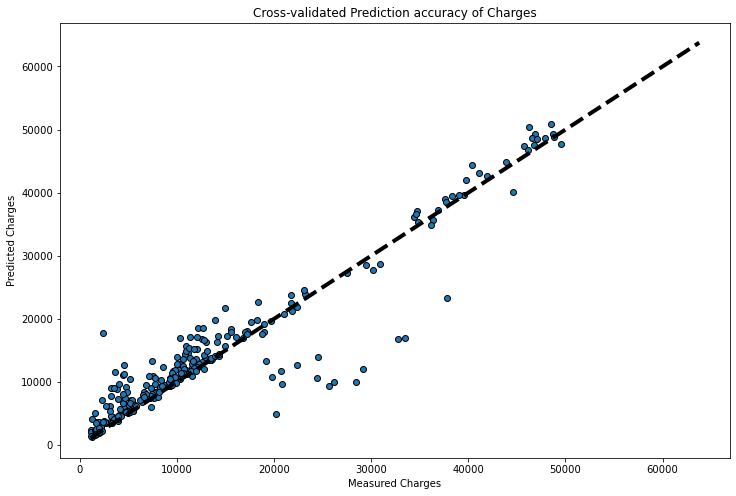

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions, edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("Measured Charges")
plt.ylabel("Predicted Charges")
plt.title("Cross-validated Prediction accuracy of Charges")
